<a href="https://colab.research.google.com/github/jihyeun-park/AI-ML-DL/blob/main/Doit_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 훈련 세트와 테스트 세트 준비

# 훈련 세트 -> fit()에 전달되어 모델 훈련하는데 사용
# 테스트 세트 -> score()에 전달되어 모델의 성능 평가

# 테스트 세트의 사용 방법 - 목표 : 어느 데이터 세트에만 치우친 모델을 만들지 않는 것

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

x = cancer.data
y = cancer.target

# 훈련 세트와 테스트 세트로 나눈다 - 일정 비율로
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42) 

In [4]:
# 그 다음 SGDClassifier 클래스 -> 로지스틱 회귀 모델 훈련

from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(x_train_all, y_train_all) # 모델 훈련
sgd.score(x_test, y_test) # 성능 평가 

# 성능 평가 결과 정확도 83% 

# 보완해주기 위해서 loss 와 같이 사용자가 직접 선택하는 매개변수 값을 바꿔보겠음

0.8333333333333334

In [5]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='hinge', random_state=42) # hinge로 바꾸면 선형 서포트 벡터 머신 문제 모델로 바뀜 = SVM
sgd.fit(x_train_all, y_train_all) # 모델 훈련
sgd.score(x_test, y_test) # 성능 평가 

 # loss 값을 hinge로 바꿨더니 정확도가 올라감

 # 즉 성능이 만족스럽지 않을 경우 loss 매개변수를 수정했듯이 다른 매개변수들도 수정해주면 됨 = 모델 튜닝의 과정

0.9385964912280702

In [7]:
# but. 테스트 세트로 모델을 튜닝하면 실전에서는 좋은 성과 내기 어려움 ... 

# 아이한테 답안지를 보여주는 셈이기 때문에 테스트에서만 좋은 성능을 보여주는 모델이 되어버림

# 모델의 일반화 성능이 왜곡 / 테스트 세트의 정보가 모델에 새어 나갔다고 말함

In [8]:
# 즉 모델 튜링을 위한 세트를 따로 준비해야 한다! 

# 모델 튜링을 위한 세트 = 검증 세트 라고 하는데 이것은 훈련 세트에서 뗴어 내어서 만든다

# 데이터 세트) 훈련 세트 : 검증 세트 : 테스트 세트 = 60 : 20 : 20

In [10]:
# 1. 데이터 세트 준비하기

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

x = cancer.data
y = cancer.target

x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [12]:
# 2. 검증 세트 분할하기

# 8:2 -> 8 -> 6:2 

# x_trian = 훈련 세트 
# x_val = 테스트 세트

x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all,
                                                  stratify=y_train_all, test_size=0.2, random_state=42) # 테스트 세트 20%
print(len(x_train), len(x_val))

364 91


In [14]:
# 3. 검증 세트 사용해 모델 평가하기 

sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(x_train, y_train)
sgd.score(x_val, y_val)

# 정확도가 69% 로 더 낮아짐

# 그 이유는 데이터 양이 적은 편이기 때문에 매개변수 값을 조금만 조절해도 정확도가 크게 변함(풀이 작기 때문에 좌지우지가 쉽다)

# 데이터가 많다면 그것의 대부분을 훈련 세트에 할당하는 것이 사실 좋다

0.6923076923076923

In [16]:
# 누락된 값을 처리하는 "데이터 전처리 과정"

# 특성의 스케일이 다른 경우에도 전처리가 필요한데, 특성의 스케일을 다른 말로 값의 범위라고 함

# 경사 하강법은 이러한 스케일이 민감한 알고리즘 -> 특성의 스케일을 맞추는 전처리가 필요 -> "스케일 조정"

['mean perimeter' 'mean area']


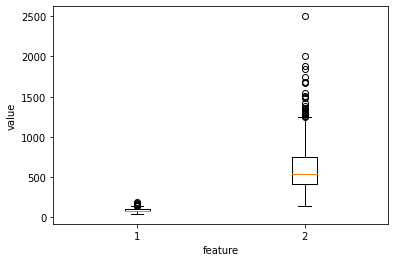

In [20]:
# 일단 스케일을 조정하지 않고 훈련을 해보겠음 !

# 1. 훈련 데이터 준비하고 스케일 비교하기

# 특성 스케일 비교를 위해 유방암 데이터의 mean perimeter & mean area 특성을 가져옴

import matplotlib.pyplot as plt

print(cancer.feature_names[[2,3]])
plt.boxplot(x_train[:,2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

# 그래프로 보니 두 특성의 스케일 차이가 큼

# 여기에 그대로 경사 하강법을 적용하면? 가중치가 어떻게 변할까

In [21]:
# 2. 가중치를 기록할 변수와 학습률 파라미터 추가하기

# SingleLayer 클래스에 인스턴스 변수 추가 -> 에포크마다 가중치의 값을 저장해 가중치 변화 관찰시 사용

def __init__(self, learning_rate=0.1):
  self.w=None
  self.b=None
  self.losses =[]
  self.w_history =[] # 인스턴스 변수 
  self.lr = learning_rate # 학습률 매개변수 -> 가중치 업데이트 양 조절

  # 전역 최솟값을 놓치지 않도록 가중치의 업데이트 양 조절이 필요

  # 적절한 학습률을 적용해야 가중치가 적절한 폭으로 업데이트되므로 천천히 전역 최솟값을 찾는다
  # = 손실 함수의 표면을 천천히 이동하여 전역 최솟값을 찾는다

In [26]:
# 3. 가중치 기록하고 업데이트 양 조절하기

# fit() 메서드에서 가중치가 바뀔 때마다 w_history 리스트에 가중치를 기록

# 넘파이 배열을 리스트에 추가하면 실제 값이 복사되는 것이 아니라 배열을 참조하기 때문에 
# 가중치 변수 self.w의 값이 바뀔 때마다 그 값을 복사하여 w_history 리스트에 추가해야 함

import numpy as np

def fit(self, x, y, epochs=100):
  self.w = np.ones(x.shape[1]) # 가중치 초기화
  self.b=0 # 절편 초기화 
  self.w_history.append(self.w.copy()) # 가중치 기록
  np.random.seed(42) # 무작위로 시드 지정
  for i in range(epochs): 
    loss=0

    # 인덱스 섞기
    indexes = np.random.permutation(np.arrange(len(x)))
    for i in indexes: # 모든 샘플에 대해 반복
      z=self.forpass(x[i]) # 정방향 계산
      a=self.activation(z) # 활성화 함수 
      err=-(y[i]-a) # 오차 계산
      w_grad, b_grad=self.backprop(x[i], err) # 역방향 계산
      self.w -= self.lr * w_grad # 가중치 업데이트
      self.b -= b_grad # 절편 업데이트

      # 가중치 기록
      self.w_history.append(self, w.copy())

      # 안전한 로그 계산을 위해 클리핑한 후 손실 누적 -> 클리핑 ??? 
      a = np.clip(a, 1e-10, 1-1e-10)
      loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))

    # 에포크마다 평균 손실 저장
    self.losses.append(loss/len(y))

In [27]:
# SingleLayer 클래스 불러오기 

class SingleLayer:
    
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b  # 직선 방정식을 계산합니다
        return z

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None) # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
        return a
        
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])               # 가중치를 초기화합니다.
        self.b = 0                                 # 절편을 초기화합니다.
        for i in range(epochs):                    # epochs만큼 반복합니다
            loss = 0
            # 인덱스를 섞습니다
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:                      # 모든 샘플에 대해 반복합니다
                z = self.forpass(x[i])             # 정방향 계산
                a = self.activation(z)             # 활성화 함수 적용
                err = -(y[i] - a)                  # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
                self.w -= w_grad                   # 가중치 업데이트
                self.b -= b_grad                   # 절편 업데이트
                # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            # 에포크마다 평균 손실을 저장합니다
            self.losses.append(loss/len(y))
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]     # 정방향 계산
        return np.array(z) > 0                   # 스텝 함수 적용
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

In [28]:
# 4. 모델 훈련하고 평가하기

layer1 = SingleLayer()
layer1.fit(x_train, y_train)
layer1.score(x_val, y_val)

0.9120879120879121

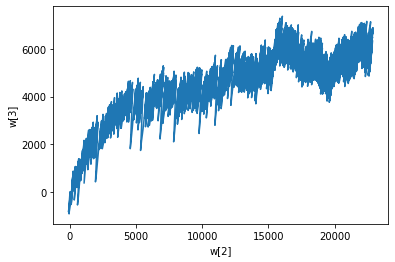

In [9]:
# 5. 그래프로 나타내기

# layer1 객체의 인스턴스 변수 w_history에는 100번의 에포크 동안 변경된 가중치가 모두 기록

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

import numpy as np
import matplotlib.pyplot as plt

cancer = load_breast_cancer()

x = cancer.data
y = cancer.target

x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all,
                                                  stratify=y_train_all, test_size=0.2, random_state=42) 

class SingleLayer:
    
    def __init__(self, learning_rate=0.1):
        self.w = None
        self.b = None
        self.losses = []
        self.w_history = []
        self.lr = learning_rate

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b  # 직선 방정식을 계산합니다
        return z

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None) # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
        return a
        
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])               # 가중치를 초기화합니다.
        self.b = 0                                 # 절편을 초기화합니다.
        self.w_history.append(self.w.copy())       # 가중치를 기록합니다.                                
        for i in range(epochs):                    # epochs만큼 반복합니다
            loss = 0
            # 인덱스를 섞습니다
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:                      # 모든 샘플에 대해 반복합니다
                z = self.forpass(x[i])             # 정방향 계산
                a = self.activation(z)             # 활성화 함수 적용
                err = -(y[i] - a)                  # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
                self.w -= w_grad                   # 가중치 업데이트
                self.b -= b_grad                   # 절편 업데이트
                # 가중치를 기록합니다
                self.w_history.append(self.w.copy()) 

                # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            # 에포크마다 평균 손실을 저장합니다
            self.losses.append(loss/len(y))
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]     # 정방향 계산
        return np.array(z) > 0                   # 스텝 함수 적용
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

layer1 = SingleLayer()
layer1.fit(x_train, y_train)
layer1.score(x_val, y_val)

w2 = []
w3 = []
for w in layer1.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

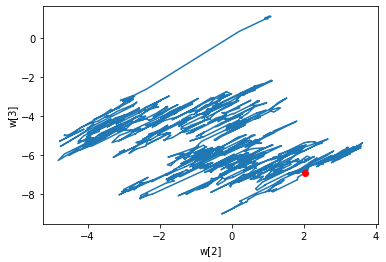

In [11]:
train_mean = np.mean(x_train, axis=0) # 넘파이의 mean()이 평균 계산 
train_std = np.std(x_train, axis=0) # 넘파이의 std()가 표준편차 계산 
# axis=0으로 두면 각 특성들이 열로 정리가 가능 

x_train_scaled = (x_train - train_mean) / train_std # 표준화 z로 변화시킨 값

layer2 = SingleLayer()
layer2.fit(x_train_scaled, y_train)
# layer2.score(x_val, y_val)

w2 = []
w3 = []
for w in layer2.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [12]:
val_mean = np.mean(x_val, axis=0)
val_std = np.std(x_val, axis=0)

# 검증세트도 마찬가지로 표준화가 필요하다
x_val_scaled = (x_val - val_mean) / val_std
layer2.score(x_val_scaled, y_val)

0.9560439560439561

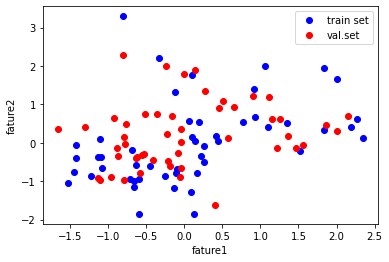

In [13]:
x_val_scaled = (x_val - train_mean) / train_std
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('fature1')
plt.ylabel('fature2')
plt.legend(['train set', 'val.set'])
plt.show()

In [15]:
layer4 = SingleLayer()
layer4.fit(x_train_scaled, y_train, epochs=20) # 조기종료
layer4.score(x_val_scaled, y_val)

# 검증세트의 손실 계산 - 손실은 로지스틱 손실 

# 손실을 나타낸 그래프 ! ! ! 

0.9560439560439561

In [18]:
# L1규제 : w_grad += alpha * np.sign(w) 
# L2규제 : w_grad += alpha * w

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

import numpy as np
import matplotlib.pyplot as plt

cancer = load_breast_cancer()

x = cancer.data
y = cancer.target

x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all,
                                                  stratify=y_train_all, test_size=0.2, random_state=42) 

class SingleLayer:
    
    # 1. 그레이디언트 업데이트 수식에 페널티 항 반영하기

    def __init__(self, learning_rate=0.1):
        self.w = None
        self.b = None
        self.losses = []
        self.val_losses = []
        self.w_history = []
        self.lr = learning_rate
        self.l1 = l1 # 규제 적용하지 않음
        self.l2 = l2

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b  # 직선 방정식을 계산합니다
        return z

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None) # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
        return a

    # 2. fit() 메서드에서 역방향 계산할때, 그레이디언트에 페널티 항의 미분값을 더함
        
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])               # 가중치를 초기화합니다.
        self.b = 0                                 # 절편을 초기화합니다.
        self.w_history.append(self.w.copy())       # 가중치를 기록합니다.     
        np.random.seed(42)    # 무작위 시드 지정

        for i in range(epochs):                    # epochs만큼 반복합니다
            loss = 0
            # 인덱스를 섞습니다
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:                      # 모든 샘플에 대해 반복합니다
                z = self.forpass(x[i])             # 정방향 계산
                a = self.activation(z)             # 활성화 함수 적용
                err = -(y[i] - a)                  # 오차 계산

                w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
                w_grad += self.l1 * np.sign(self.w) + self.l2 * self.w
                self.w -= self.l1 * w_grad         # 가중치 업데이트
                self.b -= b_grad                   # 절편 업데이트

                # 가중치를 기록합니다
                self.w_history.append(self.w.copy()) 

                # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            # 에포크마다 평균 손실을 저장합니다
            self.losses.append(loss/len(y))
            # 검증 세트에 대한 손실을 계산합니다
            self.update_val_loss(x_val, y_val)
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]     # 정방향 계산
        return np.array(z) > 0                   # 스텝 함수 적용
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

  # 3. 로지스틱 손실함수 계산에 페널티 항 추가하기
    def reg_loss(self):
      return self.l1 * np.sum(np.abs(self.w)) + self.l2/2 * np.sum(self.w**2)
  
  # 4. 검증 세트의 손실 계산
    def update_val_loss(self, x_val, y_val):
      if x_val is None:
        return 
      val_loss = 0
      for i in range(x_val):
        z = self.forpass(x_val[i]) # 정방향 계산
        a = self.activation(z) # 활성화 함수 적용
        a = np.clip(a, 1e-10, 1-1e-10)
        val_loss += -(y_val[i] * np.log(a) + (1-y_val[i]) * np.log(1-a))
      self.val_losses.append(val_loss/len(y_val) + self.reg_loss())


# 5. 로지스틱 함수에 L1 규제 적용

l1_list = [0.0001, 0.001, 0.01]

for l1 in l1_list:
  lyr = SingleLayer(l1=l1)
  lyr,fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)



TypeError: ignored